In [9]:
import nltk
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()
# things we need for Tensorflow
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import adam
import tensorflow as tf
import re
import pandas as pd
import json
import pickle
import random

# load dataset from json file which is given in the folder
with open('amharicdata.json',encoding='utf-8') as json_data:
    intents = json.load(json_data)

context = {}

In [11]:
words = []
classes = []
documents = []
ignore_words = ['?']
f=open("stopwords.txt",'r',encoding="utf-8")
#stopword = ['?'] 
ignore_word=f.read().splitlines()
f.close()
ignore_words.extend(ignore_word)
#print (ignore_words)
def remove_stopwords(text):
	modified_word_list=[word for word in text if not word  in ignore_words]
	return modified_word_list
def normalize(sentences):
    text=[i.replace('ኀ','ሀ').replace('ሐ','ሀ').replace('ሃ','ሀ').replace('ኃ','ሀ').replace('ሓ','ሀ').replace('ኁ','ሁ').replace('ሑ','ሁ').replace('ሒ','ሂ').replace('ኂ','ሂ').replace('ኄ','ሄ').replace('ሔ','ሄ').replace('ሕ','ህ').replace('ኅ','ህ').replace('ሖ','ሆ').replace('ኆ','ሆ').replace('ጸ','ፀ').replace('ጹ','ፁ').replace('ጺ','ፂ').replace('ጻ','ፃ').replace('ጼ','ፄ').replace('ጽ','ፅ').replace('ጾ','ፆ').replace('ቸ,','ቼ').replace('ሸ','ሼ').replace('ዬ','የ').replace('ዉ','ው').replace('ሓ','ሀ').replace('ሠ','ሰ').replace('ሡ','ሱ').replace('ሢ','ሲ').replace('ሣ','ሳ').replace('ሤ','ሴ').replace('ሥ','ስ').replace('ሦ','ሶ').replace('ዐ','አ').replace('ዑ','ኡ').replace('ዒ','ኢ').replace('ዓ','አ').replace('ኣ','አ').replace('ዔ','ኤ').replace('ዕ','እ').replace('ዖ','ኦ').replace('መካኒካል','ሜካኒካል').replace('ኢንጂነሪንግ','ምህንድስና').replace('ሰፍትዌር','ሶፍትዌር').replace('ሲስተም','ስይስተም').replace('ከሚካል','ኬሚካል').replace('ደምወዝ','ደሞዝ').replace('ዶሞዝ','ደሞዝ').replace('አርኪተክቸር','አርክተክቸር').replace('ኢሌክትሪካል','ኤሌክትሪካል').replace('ኮምፒተር','ኮምፕዩተር').replace('ሳይነስ','ሳይንስ').replace('ኢንፎርመሽን','ኢንፎርሜሽን').replace('ኢንዱስትርያል','ኢንዳስትሪያል').replace('ኢንዱስትሪያል','ኢንዳስትሪያል').replace('መሃንዲስ','መሀንድስ') for i in sentences]    
    return(text)
# loop through each sentence in our intents patterns
for intent in intents['intents']:
    for pattern in intent['patterns']:
        # tokenize each word in the sentence
        w = nltk.word_tokenize(pattern)
        # add to our words list
        words.extend(w)
        # add to documents in our corpus
        documents.append((w, intent['tag']))
        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])
# stem and lower each word and remove duplicates
words = [stemmer.stem(w.lower()) for w in words]
print ("total words before any pre-processing are:",len(words))
words= remove_stopwords(words)
print ("after removing stop words the number of words are:",len(words))
words= normalize(words)
#print (len(words))
words = sorted(list(set(words)))
print ("After normalizing and removing the duplicated words are:",len(words))
# sort classes
classes = sorted(list(set(classes)))
# documents = combination between patterns and intents
print (len(documents), "documents")
# classes = intents
print (len(classes), "classes", classes)
# words = all words, vocabulary
print (len(words), "unique words", words)

total words before any pre-processing are: 2669
after removing stop words the number of words are: 1904
After normalizing and removing the duplicated words are: 479
604 documents
61 classes ['ID መጥፋት', 'መርሃ ግብሮች ፕሮግራም', 'ማስጠንቀቅያ ውጤት', 'ማገዝ', 'ሜካኒካል ምህንድስና', 'ምህንድስና ሚሰራበት ቦታ', 'ምስጋና', 'ምዝገባ ችግር', 'ሰላምታ', 'ሲቪል ምህንድስና', 'ስለ አድቫይዘር በይበልጥ', 'ስለ ኢንጂነሪንግ በይበልጥ', 'ሶፍትዌር ምህንድስና', 'በትምህርት ምክንያት መባረር', 'በፈተና ወቅት መታመም', 'ትርፍ ጊዜ', 'አላሟላም ውጤት', 'አርክተክቸር ምህንድስና', 'አቴንዳንስ', 'አድቫይዘር', 'አድቫይዘር መቀየር', 'አድቫይዘር መገናኘት', 'ኢንዳስትሪያል ምህንድስና', 'ኢንጂነሪንግ', 'ኢንጂነሪንግ ለመግባት', 'ኢንፎርሜሽን ስይስተም', 'ኢንፎርሜሽን ቴክኖሎጂ', 'ኤሌክትሪካል ምህንድስና', 'ኤል ኤች ክፍል', 'እርዳታ', 'ኬሚካል ምህንድስና', 'ክሬዲት ሃወር', 'ኮምፕዩተር ሳይንስ', 'ኮምፕዩቲንግ ዲፓርትመንት', 'ኮርስ መድገም', 'ኮርስ መጣልና መጨመር', 'ዊዝ ድረው', 'የምህንድስና ጥቅሞች', 'የምዝገባ ሂደት', 'የስራ ጊዜ', 'የተማሪዎች ጥቅማጥቅሞች', 'የዊዝ ድረው ጊዜ', 'የግል አስተማሪ', 'የግዜ ሰሌዳ መቀየር', 'ዩኒቨርስቲ መቀየር', 'ደካማ ውጤት', 'ዲፓርትመንት ልውውጥ', 'ዲፓርትመንቶች', 'ዳግም ምዝገባ', 'ግሬድ ማስላት', 'ግሬድ ማየት', 'ግሬድ ስኬል', 'ግሬድ ዋጋ', 'ጤንነት', 'ፈተና ማራዘም', 'ፈተና ኣለመፈተን', 'ፈተና ከተራዘመ', 'ፈተና ዋጋ', 'ፕሪ ኢንጂነሪ

In [37]:
# create our training data
training = []
# create an empty array for our output
output_empty = [0] * len(classes)
# training set, bag of words for each sentence
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # stem each word - create base word, in attempt to represent related words
    pattern_words = [stemmer.stem(word.lower()) for word in pattern_words]
    # create our bag of words array with 1, if word match found in current pattern
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)
    # output is a '0' for each tag and '1' for current tag (for each pattern)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1    
    training.append([bag, output_row])
# shuffle our features and turn into np.array
random.shuffle(training)
training = np.array(training)
# create train and test lists. X - patterns, Y - intents
x = list(training[:,0])
y = list(training[:,1])
from sklearn.model_selection import train_test_split as tts
train_x,test_x,train_y,test_y=tts(x, y, test_size=.2, random_state=42)
print("the 80% of the dataset for training the model is:",len(train_x))
print("the 20% of test_data for validation is :",len(test_y))

val_x=np.array(test_x)
val_y=np.array(test_y)

the 80% of the dataset for training the model is: 483
the 20% of test_data for validation is : 121


In [38]:
# Create model - 4 layers. 1st layer 128 neurons,2nd layer 64 neurons,3rd layer 32 neurons
# and 4th output layer contains number of neurons equal to number of intents to predict output intent with softmax
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, ))
model.add(Dense(32, ))
#model.add(Dropout(0.2))
model.add(Dense(len(train_y[0]), activation='softmax'))

In [39]:
# Compile model. Stochastic gradient descent with Nesterov accelerated gradient gives good results for this model
Adam = adam(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=Adam, metrics=['accuracy'])

# Fit the model
history=model.fit(np.array(train_x), np.array(train_y), epochs=150, batch_size=8,validation_data=(val_x,val_y), verbose=1)

Train on 483 samples, validate on 121 samples
Epoch 1/150
483/483 [==============================] - 1s 2ms/step - loss: 4.1100 - acc: 0.0145 - val_loss: 4.0988 - val_acc: 0.0248
Epoch 2/150
483/483 [==============================] - 0s 742us/step - loss: 4.0859 - acc: 0.0248 - val_loss: 4.0849 - val_acc: 0.0744
Epoch 3/150
483/483 [==============================] - 0s 703us/step - loss: 4.0624 - acc: 0.0455 - val_loss: 4.0708 - val_acc: 0.0744
Epoch 4/150
483/483 [==============================] - 0s 692us/step - loss: 4.0395 - acc: 0.0849 - val_loss: 4.0555 - val_acc: 0.0992
Epoch 5/150
483/483 [==============================] - 0s 672us/step - loss: 4.0143 - acc: 0.0973 - val_loss: 4.0390 - val_acc: 0.0909
Epoch 6/150
483/483 [==============================] - 0s 604us/step - loss: 3.9882 - acc: 0.1449 - val_loss: 4.0212 - val_acc: 0.1157
Epoch 7/150
483/483 [==============================] - 0s 554us/step - loss: 3.9608 - acc: 0.1988 - val_loss: 4.0019 - val_acc: 0.0909
Epoch 8/150

Epoch 61/150
483/483 [==============================] - 0s 554us/step - loss: 0.4536 - acc: 0.9503 - val_loss: 1.3598 - val_acc: 0.7603
Epoch 62/150
483/483 [==============================] - 0s 568us/step - loss: 0.4455 - acc: 0.9462 - val_loss: 1.3451 - val_acc: 0.7521
Epoch 63/150
483/483 [==============================] - 0s 587us/step - loss: 0.4450 - acc: 0.9441 - val_loss: 1.3273 - val_acc: 0.7521
Epoch 64/150
483/483 [==============================] - 0s 569us/step - loss: 0.4180 - acc: 0.9462 - val_loss: 1.3132 - val_acc: 0.7521
Epoch 65/150
483/483 [==============================] - 0s 573us/step - loss: 0.3905 - acc: 0.9565 - val_loss: 1.2984 - val_acc: 0.7521
Epoch 66/150
483/483 [==============================] - 0s 584us/step - loss: 0.3765 - acc: 0.9565 - val_loss: 1.2841 - val_acc: 0.7603
Epoch 67/150
483/483 [==============================] - 0s 568us/step - loss: 0.3606 - acc: 0.9607 - val_loss: 1.2677 - val_acc: 0.7438
Epoch 68/150
483/483 [==========================

Epoch 121/150
483/483 [==============================] - 0s 568us/step - loss: 0.0602 - acc: 0.9896 - val_loss: 1.1319 - val_acc: 0.7769
Epoch 122/150
483/483 [==============================] - 0s 586us/step - loss: 0.0606 - acc: 0.9896 - val_loss: 1.1388 - val_acc: 0.7769
Epoch 123/150
483/483 [==============================] - 0s 548us/step - loss: 0.0556 - acc: 0.9896 - val_loss: 1.1435 - val_acc: 0.7769
Epoch 124/150
483/483 [==============================] - 0s 570us/step - loss: 0.0614 - acc: 0.9917 - val_loss: 1.1469 - val_acc: 0.7686
Epoch 125/150
483/483 [==============================] - 0s 585us/step - loss: 0.0618 - acc: 0.9896 - val_loss: 1.1492 - val_acc: 0.7769
Epoch 126/150
483/483 [==============================] - 0s 569us/step - loss: 0.0492 - acc: 0.9938 - val_loss: 1.1581 - val_acc: 0.7603
Epoch 127/150
483/483 [==============================] - 0s 586us/step - loss: 0.0565 - acc: 0.9896 - val_loss: 1.1688 - val_acc: 0.7686
Epoch 128/150
483/483 [==================

In [28]:
model.save('model_FAQ_ChatBot.h5')

In [16]:
def remove_stopwords(text):
	modified_word_list=[word for word in text if not word  in ignore_words]
	return modified_word_list

def normalize(sentence):
    text=[i.replace('ኀ','ሀ').replace('ሐ','ሀ').replace('ሃ','ሀ').replace('ኃ','ሀ').replace('ሓ','ሀ').replace('ኁ','ሁ').replace('ሑ','ሁ').replace('ሒ','ሂ').replace('ኂ','ሂ').replace('ኄ','ሄ').replace('ሔ','ሄ').replace('ሕ','ህ').replace('ኅ','ህ').replace('ሖ','ሆ').replace('ኆ','ሆ').replace('ጸ','ፀ').replace('ጹ','ፁ').replace('ጺ','ፂ').replace('ጻ','ፃ').replace('ጼ','ፄ').replace('ጽ','ፅ').replace('ጾ','ፆ').replace('ቸ,','ቼ').replace('ሸ','ሼ').replace('ዬ','የ').replace('ዉ','ው').replace('ሓ','ሀ').replace('ሠ','ሰ').replace('ሡ','ሱ').replace('ሢ','ሲ').replace('ሣ','ሳ').replace('ሤ','ሴ').replace('ሥ','ስ').replace('ሦ','ሶ').replace('ዐ','አ').replace('ዑ','ኡ').replace('ዒ','ኢ').replace('ዓ','አ').replace('ኣ','አ').replace('ዔ','ኤ').replace('ዕ','እ').replace('ዖ','ኦ').replace('መካኒካል','ሜካኒካል').replace('ኢንጂነሪንግ','ምህንድስና').replace('ሰፍትዌር','ሶፍትዌር').replace('ሲስተም','ስይስተም').replace('ከሚካል','ኬሚካል').replace('ደምወዝ','ደሞዝ').replace('ዶሞዝ','ደሞዝ').replace('አርኪተክቸር','አርክተክቸር').replace('ኢሌክትሪካል','ኤሌክትሪካል').replace('ኮምፒተር','ኮምፕዩተር').replace('ሳይነስ','ሳይንስ').replace('ኢንፎርመሽን','ኢንፎርሜሽን').replace('ኢንዱስትርያል','ኢንዳስትሪያል').replace('ኢንዱስትሪያል','ኢንዳስትሪያል').replace('መሃንዲስ','መሀንድስ') for i in sentence]    
    return(text)
    
def clean_up_sentence(sentence):
    #sentence_words= normalize(sentence)
    # tokenize the pattern - split words into array
    sentence_words = nltk.word_tokenize(sentence)
    # stem each word - create short form for word
    sentence_words = [stemmer.stem(word.lower()) for word in sentence_words if word not in ignore_words]
    sentence_words= normalize(sentence_words)
    return sentence_words


In [17]:
# return bag of words array: 0 or 1 for each word in the bag that exists in the sentence
def bow(sentence, words, show_details=True):
    # tokenize the pattern
    sentence_words = clean_up_sentence(sentence)
    # bag of words - matrix of N words, vocabulary matrix
    bag = [0]*len(words)  
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s: 
                # assign 1 if current word is in the vocabulary position
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)
    return(np.array(bag))

In [19]:
# save all of our data structures
from keras.models import load_model
model=load_model('model_FAQ_Chatbot.h5')

In [20]:
ERROR_THRESHOLD = 0.25
def classify(sentence):
    # generate probabilities from the model
    p = bow(sentence, words)
    
    d = len(p)
    f = len(documents)-2
    a = np.zeros([f, d])
    tot = np.vstack((p,a))
    
    results = model.predict(tot)[0]
    
    # filter out predictions below a threshold
    results = [[i,r] for i,r in enumerate(results) if r>ERROR_THRESHOLD]
    # sort by strength of probability
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append((classes[r[0]], r[1]))
    # return tuple of intent and probability
    return return_list

In [21]:
def response(sentence, userID='123', show_details=False):
    results = classify(sentence)
    #print('Result:',results)
    # if we have a classification then find the matching intent tag
    if results:
        # loop as long as there are matches to process
        while results:
            for i in intents['intents']:
                # find a tag matching the first result
                if i['tag'] == results[0][0]:
                    # set context for this intent if necessary
                    if 'context_set' in i:
                        if show_details: print ('context:', i['context_set'])
                        context[userID] = i['context_set']

                    # check if this intent is contextual and applies to this user's conversation
                    if not 'context_filter' in i or \
                        (userID in context and 'context_filter' in i and i['context_filter'] == context[userID]):
                        if show_details: print ('tag:', i['tag'])
                        # a random response from the intent
                        return (random.choice(i['responses']))
            results.pop(0)
    else:
        reply="ይቅርታ አልገባኝም ወይም ሌላ ጠይቀኝ"
        return(reply)

In [40]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
pred = model.predict(val_x)
predicted=np.argmax(pred, axis=1)
report=classification_report(np.argmax(val_y, axis=1),predicted)

result = model.evaluate(val_x,val_y, verbose=0)
#res=np.argmax(result, axis=1)
f1=f1_score(np.argmax(val_y, axis=1),predicted,average="macro")
precision=precision_score(np.argmax(val_y, axis=1),predicted,average="macro")
recall=recall_score(np.argmax(val_y, axis=1),predicted,average="macro")

print("Accuracy: %.2f%%" % (result[1]*100))

#y_pred = model.predict(testx)
print("F1 Score: %.2f%%" % (f1*100))
print("Precision Score: %.2f%%" % (precision*100)) 
print("Recall Score: %.2f%%" % (recall*100))

Accuracy: 74.38%
F1 Score: 68.02%
Precision Score: 71.21%
Recall Score: 69.82%


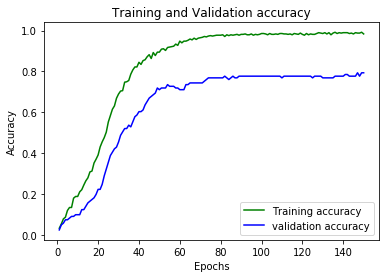

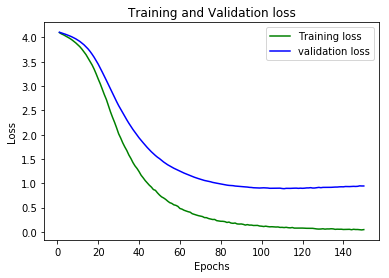

In [24]:
import matplotlib.pyplot as plt
loss_train = history.history['acc']
loss_val = history.history['val_acc']
epochs = range(1, len(loss_train) + 1)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1, len(loss_train) + 1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()